## Alpha Tuning Results

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from scipy.special import comb

In [133]:
df_alpha_tuning = pd.read_csv('alpha_tuning.csv')

In [ ]:
# Read columns in as variables
alphas = df_alpha_tuning['alpha']
accuracies = df_alpha_tuning['accuracy']
times = df_alpha_tuning['time']
exit_indices = df_alpha_tuning['avg_exit_idx']

In [ ]:
# Bezier curve function
def bezier_curve(points, nTimes=50):
    nPoints = len(points)
    xPoints = np.array([p[0] for p in points])
    yPoints = np.array([p[1] for p in points])

    def bpoly(n, t, k):
        return t ** k * (1 - t) ** (n - k) * comb(n, k)

    def bmatrix(T):
        return np.matrix([[bpoly(nPoints - 1, t, k) for k in range(nPoints)] for t in T])

    t = np.linspace(0.0, 1.0, nTimes)

    polynomial_array = np.array([bpoly(nPoints - 1, t, i) for i in range(nPoints)])

    xvals = np.dot(xPoints, polynomial_array)
    yvals = np.dot(yPoints, polynomial_array)

    return xvals, yvals

## Line Plots

In [131]:
# Read columns in as variables
alphas = df_alpha_tuning['alpha']
accuracies = df_alpha_tuning['accuracy']
times = df_alpha_tuning['time']
exit_indices = df_alpha_tuning['avg_exit_idx']

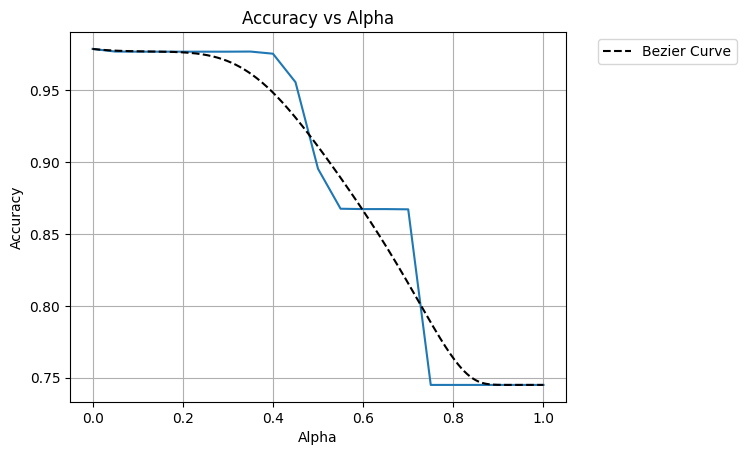

In [142]:
# Alpha vs Accuracy
plt.plot(alphas, accuracies)

b_curve_data = []
for i in range(len(accuracies)):
    b_curve_data.append([alphas[i],accuracies[i]])

x_data, y_data = bezier_curve(b_curve_data, nTimes=1000)
plt.plot(x_data, y_data, linestyle='--', color='black', label='Bezier Curve')

plt.title('Accuracy vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

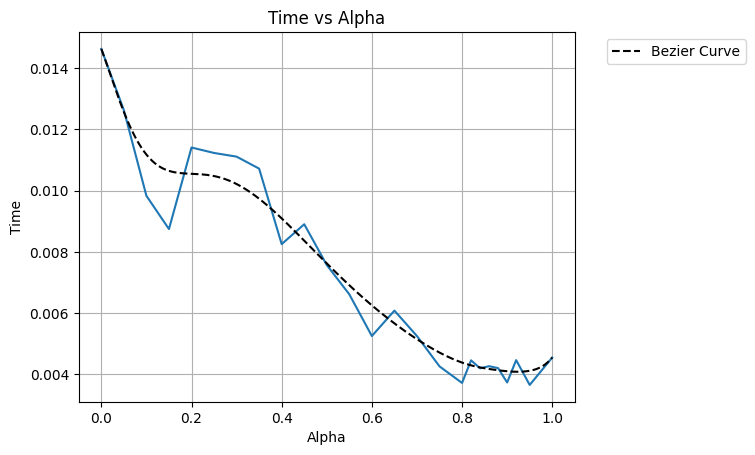

In [141]:
# Alpha vs Time
plt.plot(alphas, times)

b_curve_data = []
for i in range(len(accuracies)):
    b_curve_data.append([alphas[i],times[i]])

x_data, y_data = bezier_curve(b_curve_data, nTimes=1000)
plt.plot(x_data, y_data, linestyle='--', color='black', label='Bezier Curve')

plt.title('Time vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

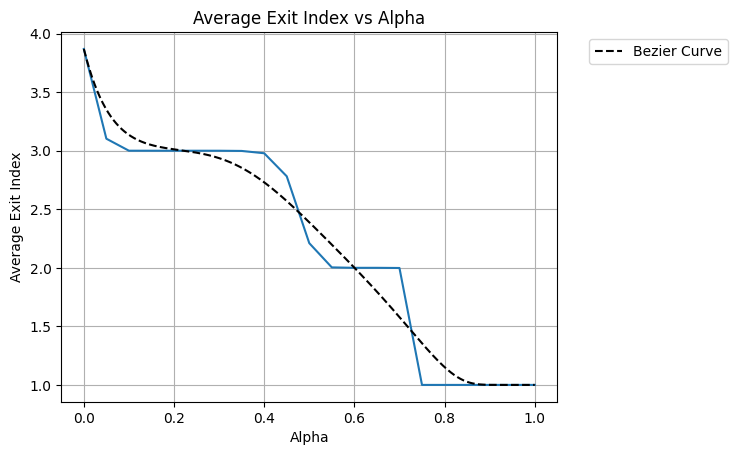

In [140]:
# Alpha vs Exit Index
plt.plot(alphas, exit_indices)

b_curve_data = []
for i in range(len(accuracies)):
    b_curve_data.append([alphas[i],exit_indices[i]])

x_data, y_data = bezier_curve(b_curve_data, nTimes=1000)
plt.plot(x_data, y_data, linestyle='--', color='black', label='Bezier Curve')

plt.title('Average Exit Index vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Average Exit Index')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

## Scatter Plots

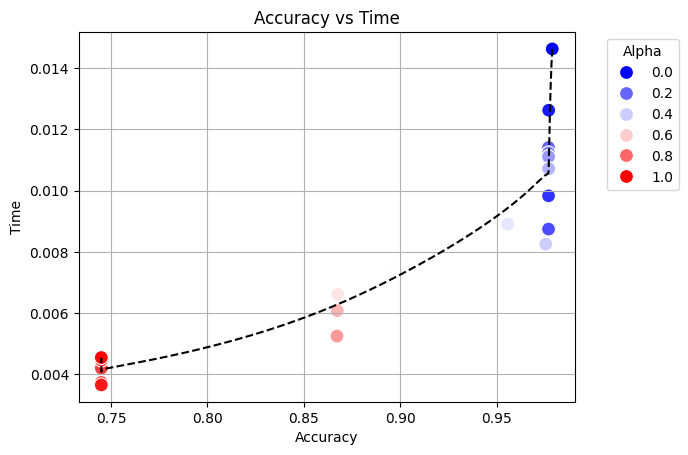

In [136]:
# Accuracy vs Time
sns.scatterplot(x='accuracy', y='time', hue='alpha', data=df_alpha_tuning, s=100, palette='bwr')

b_curve_data = []
for i in range(len(accuracies)):
    b_curve_data.append([accuracies[i],times[i]])

x_data, y_data = bezier_curve(b_curve_data, nTimes=1000)
plt.plot(x_data, y_data, linestyle='--', color='black')

plt.legend()
plt.title('Accuracy vs Time')
plt.xlabel('Accuracy')
plt.ylabel('Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Alpha')
plt.grid()
plt.show()


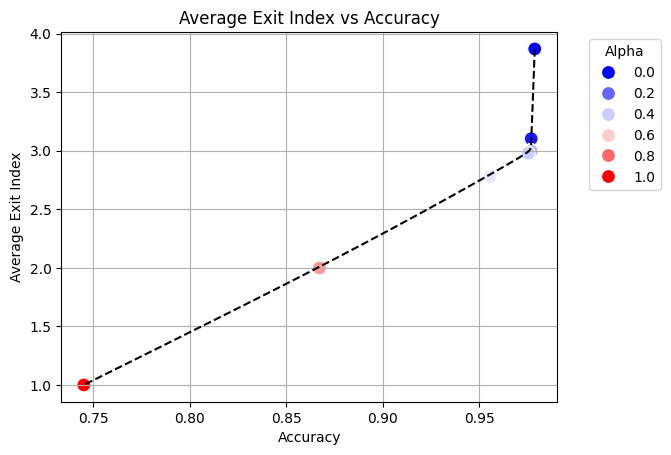

In [137]:
# Accuracy vs Exit Index
sns.scatterplot(x='accuracy', y='avg_exit_idx', hue='alpha', data=df_alpha_tuning, s=100, palette='bwr')

b_curve_data = []
for i in range(len(accuracies)):
    b_curve_data.append([accuracies[i],exit_indices[i]])

x_data, y_data = bezier_curve(b_curve_data, nTimes=1000)
plt.plot(x_data, y_data, linestyle='--', color='black')

plt.title('Average Exit Index vs Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Average Exit Index')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Alpha')
plt.grid()
plt.show()